## Pie and Column Charts
### Data Visualization with Python example

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [2]:
#Load data
attributes = ['sex', 'rings']
abalone = pd.read_csv('abalone.data', header=None, names=attributes, usecols=[0,8])

In [3]:
#Define data for pie chart
sex = pd.DataFrame(abalone.sex.value_counts().rename_axis('sex').reset_index(name='count'))

m = sex[sex['sex'] == 'M']['count']  #Required for pie_abs_labels function
i = sex[sex['sex'] == 'I']['count']
f = sex[sex['sex'] == 'F']['count']

#Define data for column chart
r_mean_m = abalone[abalone['sex'] == 'M'].rings.mean()  #Mean values
r_mean_i = abalone[abalone['sex'] == 'I'].rings.mean()
r_mean_f = abalone[abalone['sex'] == 'F'].rings.mean()

r_means = {'M':{'mean': r_mean_m}, 'I':{'mean': r_mean_i}, 'F':{'mean': r_mean_f}}
r_means = pd.DataFrame.from_dict(r_means, orient='index')
r_means = r_means.rename_axis('sex').sort_values('mean', ascending=False).reset_index()

In [4]:
#Function to add values on pie chart
def pie_abs_labels(pct, allvals):
    absolute = int(np.round(pct/100.*np.sum(allvals)))
    return "{:.1f}%\n({:d})".format(pct, absolute)

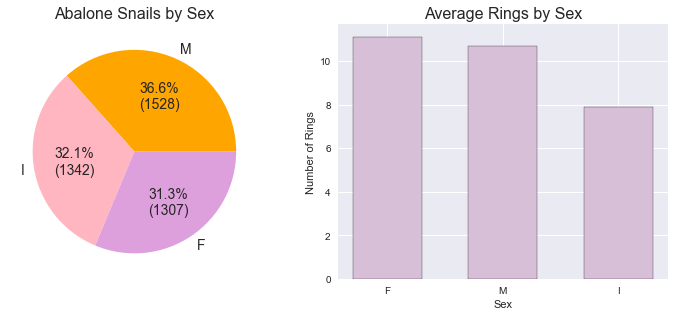

In [6]:
#Plot data
plt.style.use('seaborn')

figure, axes = plt.subplots(1,2)
figure.set_size_inches(10,4.5)

axes[0].pie(sex['count'], 
            labels=sex['sex'], 
            autopct=lambda pct: pie_abs_labels(pct, [m, i, f]),
            colors=['orange', 'lightpink', 'plum'],
            textprops={'fontsize':14})
axes[0].set_title('Abalone Snails by Sex', fontsize=16)

axes[1].bar(r_means['sex'], r_means['mean'],
            color=['thistle'],
            edgecolor='black',
            width=0.6)
axes[1].set_title('Average Rings by Sex', fontsize=16)
axes[1].set_xlabel('Sex')
axes[1].set_ylabel('Number of Rings')

plt.tight_layout()
plt.savefig('case_5_pie_column_chart.png', dpi=(300))
plt.show()